# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  0%|          | 0/43 [00:00<?, ?it/s]

[316, 311, 316, 302, 314, 318, 313, 320, 315, 311, 310, 307, 314]
2 chs: 316 entries
3 chs: 311 entries
4 chs: 316 entries
5 chs: 302 entries
6 chs: 314 entries
7 chs: 318 entries
8 chs: 313 entries
9 chs: 320 entries
10 chs: 315 entries
15 chs: 311 entries
20 chs: 310 entries
30 chs: 307 entries
40 chs: 314 entries
Dataset entries: 3926


 77%|███████▋  | 33/43 [00:11<00:03,  2.58it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 91%|█████████ | 39/43 [00:12<00:00,  4.79it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:07,  4.51it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:12<00:02,  4.46it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:14<00:00,  5.10it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 74%|███████▍  | 32/43 [00:11<00:03,  2.82it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:13<00:01,  3.51it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 23%|██▎       | 10/43 [00:01<00:05,  6.42it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:10<00:04,  2.54it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:12<00:01,  2.93it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 95%|█████████▌| 41/43 [00:13<00:00,  3.58it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:05,  5.98it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:11<00:01,  3.01it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:16<00:01,  2.60it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:05,  6.43it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:12<00:02,  3.71it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:14<00:01,  3.26it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:15<00:00,  2.86it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['GaussianProcessRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'Ridge'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fontSize = 32
    
    fig, axis = plt.subplots(2, figsize = (10, 10))
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Test error for Gain", fontsize = fontSize)
    axis[0].get_xaxis().set_visible(False)
    axis[0].yaxis.set_tick_params(labelsize = fontSize)
    axis[0].set_yticklabels(range(0, 4))
    axis[0].set_ylim(0, 3)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Test error for Loss", fontsize = fontSize)
    axis[1].xaxis.set_tick_params(labelsize = fontSize)
    axis[1].yaxis.set_tick_params(labelsize = fontSize)
    axis[1].set_xticklabels(strategyArray)
    axis[1].set_yticklabels(range(0, 4))
    axis[1].set_ylim(0, 3)

    #fig.text(0.053, 0.5, 'Erro Médio Absoluto (dB)', va='center', rotation='vertical', fontsize = fontSize)

    plt.gcf().subplots_adjust(bottom = 0.08)
    fig.savefig("../../graphs/perVar-{}amp.pdf".format(data.ampNumber), format = 'pdf', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
cvData = []
X, y = data.loadDataset()

for i in range(5):
    X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.2, random_state = i)
    cvData.append([X_train, X_test, y_train, y_test])
    
count = 1

In [6]:
from sklearn.linear_model import BayesianRidge

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(BayesianRidge())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("BR")
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [1.69912601e+01 8.77597301e-04 1.83519251e+01 3.62469400e-01
 1.93620138e+01 1.35697271e+00 2.19546661e+01 5.86624033e-01]
[17.  0. 19.  1. 19.  1. 24.  2.] [1.69825958e+01 7.45052459e-04 1.83505828e+01 3.52134116e-01
 1.93749220e+01 1.36913580e+00 2.19420542e+01 1.28615835e+00]
[17.  0. 18.  0. 18.  0. 20.  0.] [1.69878251e+01 4.45089355e-05 1.83662764e+01 3.90200825e-01
 1.92865965e+01 1.26286483e+00 2.19368233e+01 3.66977625e-02]
[17.  0. 18.  0. 20.  3. 20.  0.] [16.98849377  0.04147119 18.37800109  0.43223325 19.40990463  1.39189815
 21.97839371  0.23633472]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.05880318  0.10989873 18.3400594   0.34255957 19.42001898  1.43435126
 21.96179137  0.12158801]


In [7]:
from sklearn.ensemble import RandomForestRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(RandomForestRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("RF".format(count))
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [16.99110866  0.         18.3136912   0.33471892 19.37241578  1.35431798
 21.90937168  0.58888847]
[17.  0. 19.  1. 19.  1. 24.  2.] [16.9794435   0.         18.30617978  0.31878307 19.29242257  1.29362004
 21.97924781  1.29659468]
[17.  0. 18.  0. 18.  0. 20.  0.] [16.98915142  0.         18.34134387  0.37902767 19.27837388  1.25179377
 21.7619313   0.0368548 ]
[17.  0. 18.  0. 20.  3. 20.  0.] [16.98783522  0.04367984 18.43867239  0.46398204 19.39838349  1.4007849
 21.94840331  0.23480369]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.06481523  0.10790469 18.3462134   0.34149092 19.52013505  1.51609085
 22.01764605  0.11642241]


In [8]:
from sklearn.tree import DecisionTreeRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(DecisionTreeRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("DT")
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [16.992  0.    18.316  0.34  19.36   1.356 21.912  0.588]
[17.  0. 19.  1. 19.  1. 24.  2.] [16.98023715  0.         18.30434783  0.31620553 19.28853755  1.28853755
 21.97233202  1.29644269]
[17.  0. 18.  0. 18.  0. 20.  0.] [16.98795181  0.         18.34136546  0.3815261  19.27309237  1.25301205
 21.75502008  0.03614458]
[17.  0. 18.  0. 20.  3. 20.  0.] [16.98832685  0.04280156 18.43968872  0.46303502 19.40856031  1.38910506
 21.95330739  0.23346304]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.06349206  0.11111111 18.34126984  0.34126984 19.50793651  1.51984127
 22.01984127  0.11507937]


In [9]:
from sklearn.linear_model import LassoCV

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(LassoCV())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("LCV")
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [1.69860973e+01 2.10238982e-03 1.83672385e+01 3.56265169e-01
 1.93599997e+01 1.35599916e+00 2.19425047e+01 5.80506930e-01]
[17.  0. 19.  1. 19.  1. 24.  2.] [1.69875280e+01 3.16987423e-03 1.83161923e+01 3.23868640e-01
 1.93783069e+01 1.36640212e+00 2.19414649e+01 1.29487100e+00]
[17.  0. 18.  0. 18.  0. 20.  0.] [1.69879518e+01 3.70330749e-04 1.83463749e+01 3.83739386e-01
 1.93434332e+01 1.34628827e+00 2.18716161e+01 3.76805093e-02]
[17.  0. 18.  0. 20.  3. 20.  0.] [16.98941799  0.03741878 18.36800001  0.45147522 19.40079365  1.39285714
 21.97928615  0.24613674]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.05686652  0.10665865 18.33303631  0.33110324 19.43278592  1.4662677
 21.97257248  0.12124795]


In [10]:
from sklearn.dummy import DummyRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(DummyRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("SM".format(count))
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [17.00919399  0.04045357 18.3588722   0.37296966 19.38369599  1.37940546
 21.96199816  0.42905302]
[17.  0. 19.  1. 19.  1. 24.  2.] [17.01072633  0.0429053  18.35396874  0.37082439 19.37358259  1.36775973
 21.94146491  0.42782715]
[17.  0. 18.  0. 18.  0. 20.  0.] [17.01195219  0.0447441  18.3570334   0.37021146 19.37817959  1.37511492
 21.94115844  0.42690775]
[17.  0. 18.  0. 20.  3. 20.  0.] [17.00888753  0.0429053  18.36040454  0.37327613 19.38461538  1.37603432
 21.97885382  0.43334355]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.01225866  0.04351823 18.35366227  0.37205026 19.39718051  1.38737358
 21.96015936  0.43181122]


dict_keys(['GaussianProcessRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'Ridge'])
### Gain ###
Mean: 0.7496262758792014. Median: 0.740421892887051
Mean: 0.749740292718314. Median: 0.7372276540521163
Mean: 0.7497824068613035. Median: 0.736328125
Mean: 0.749703738552319. Median: 0.7392686305032701
Mean: 0.7469887043079567. Median: 0.7408826233527428
### Loss ###
Mean: 0.5076509076637865. Median: 0.48844122326665873
Mean: 0.5054715442558062. Median: 0.48321496827564325
Mean: 0.505478560290953. Median: 0.4847779424935915
Mean: 0.5066526398996553. Median: 0.48907648726438335
Mean: 0.5409778495369953. Median: 0.5542445602206558
Mean Total - Gain: 0.7491682836638189. Loss: 0.5132463003294393


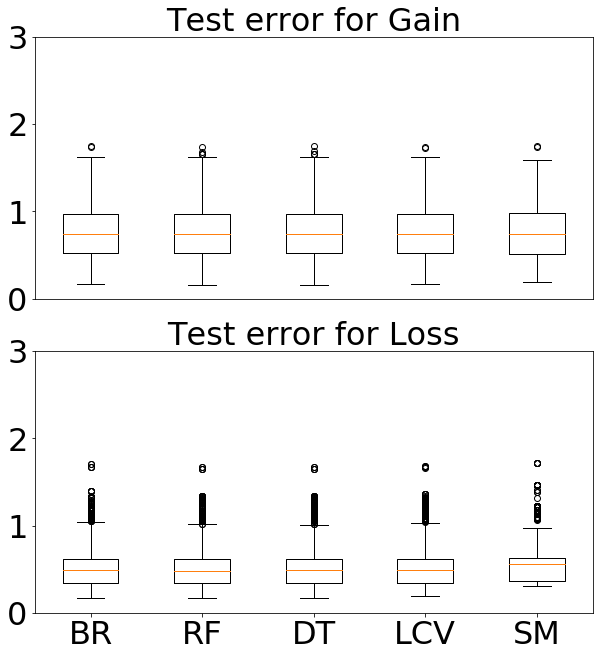

In [11]:
import numpy as np
print(sortedDict.keys())

gain = 0
print("### Gain ###")

for gainError in errorArray[0]:
    gain += np.mean(gainError)
    print("Mean: {}. Median: {}".format(np.mean(gainError), np.median(gainError)))

loss = 0
print("### Loss ###")

for lossError in errorArray[1]:
    loss += np.mean(lossError)
    print("Mean: {}. Median: {}".format(np.mean(lossError), np.median(lossError)))
    
print("Mean Total - Gain: {}. Loss: {}".format(gain / 5, loss / 5))
plotGrid(errorArray[0], errorArray[1])